# Visualization

In [1]:
from pathlib import Path

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from model import Model

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cpu


## Load data from training

In [5]:
training_path = Path(".")

In [6]:
model_path = training_path / "model_checkpoint.pt"
model_path.exists()

True

In [7]:
results_path = training_path / "res.tar"
results_path.exists()

True

In [8]:
res_dict = torch.load(results_path, weights_only=False, map_location=device)
res_dict

{'accuracies': array([0., 0.]),
 'f1s': array([0., 0.]),
 'losses': array([0.82115829, 0.23539889]),
 'num_frames': 120,
 'sample_rate': 16000,
 'num_hidden_layers': 6,
 'num_attention_heads': 3,
 'intermediate_size': 30,
 'epochs': 2}

In [11]:
epochs = np.arange(res_dict["epochs"])
epochs

array([0, 1])

## Training results

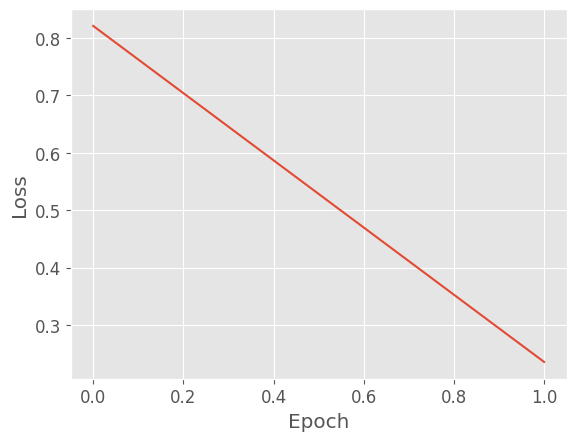

In [14]:
with plt.style.context("ggplot_perso.mplstyle"):
    fig, ax = plt.subplots()
    ax.plot(epochs, res_dict["losses"])
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    plt.show()

## Model performance

In [16]:
model_state_dict = torch.load(model_path, weights_only=False, map_location=device)

In [17]:
model = Model(
    num_frames=res_dict["num_frames"],
    sample_rate=res_dict["sample_rate"],
    num_hidden_layers=res_dict["num_hidden_layers"],
    num_attention_heads=res_dict["num_attention_heads"],
    intermediate_size=res_dict["intermediate_size"],
)

/home/kir0ul/Projects/COMP.5530_DL-project/.direnv/python-3.13.9/lib64/python3.13/site-packages/transformers/audio_utils.py:525: UserWarning: At least one mel filter has all zero values. The value for `num_mel_filters` (128) may be set too high. Or, the value for `num_frequency_bins` (257) may be set too low.
  warnings.warn(


In [19]:
model.load_state_dict(state_dict=model_state_dict)

<All keys matched successfully>